In [1]:
import numpy as np
import pandas as pd

meters = pd.read_csv("C://Users//Oluwajuwon//Documents//Smart Systems//Projects//Data Science Projects//project_notebooks//combined_data.csv")

In [2]:
meters.head()

,Unnamed: 0,meter_id,w_timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675
1,1,OND023,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,14,0.009675
2,2,OND023,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,15,0.009675
3,3,OND023,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,15,0.009675
4,4,OND023,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,15,0.009675


In [3]:
meters.shape

(306708, 14)

In [4]:
meters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306708 entries, 0 to 306707
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      306708 non-null  int64  
 1   meter_id        306708 non-null  object 
 2   w_timestamp     306708 non-null  object 
 3   current         306708 non-null  float64
 4   voltage         306708 non-null  float64
 5   frequency       306708 non-null  float64
 6   power_factor    306708 non-null  float64
 7   energy          306705 non-null  float64
 8   real_power      306708 non-null  float64
 9   reactive_power  306708 non-null  float64
 10  apparent_power  306708 non-null  float64
 11  tita            306708 non-null  float64
 12  hour            306708 non-null  int64  
 13  time_diff       306708 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 32.8+ MB


In [5]:
meters.describe()

,Unnamed: 0,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
count,306708.000000,306708.000000,306708.000000,306708.000000,306708.000000,306705.000000,306708.000000,306708.000000,306708.000000,306708.000000,306708.000000,306708.000000
mean,55287.070011,1.692299,224.184694,50.156341,0.747980,0.006226,0.299876,0.204738,0.375111,39.160152,12.425261,0.010583
std,44737.683429,1.588362,20.359321,0.264998,0.170631,0.217799,0.307117,0.167439,0.336886,15.472669,7.334204,0.002791
min,0.000000,0.020000,63.180000,48.900000,0.000000,0.000000,0.000000,0.000000,0.004308,0.000000,1.000000,0.009675
25%,19169.000000,0.690000,215.550000,50.000000,0.690000,0.001233,0.123932,0.066422,0.160977,30.683417,6.000000,0.009675
50%,41934.000000,1.410000,230.000000,50.100000,0.760000,0.002294,0.225883,0.172581,0.308560,40.535802,12.000000,0.009675
75%,84406.250000,2.190000,237.700000,50.300000,0.860000,0.003799,0.368105,0.301727,0.481396,46.369891,19.000000,0.009759
max,161083.000000,14.920000,269.900000,51.400000,1.000000,68.100813,2.970418,1.254506,2.970418,90.000000,24.000000,0.019465


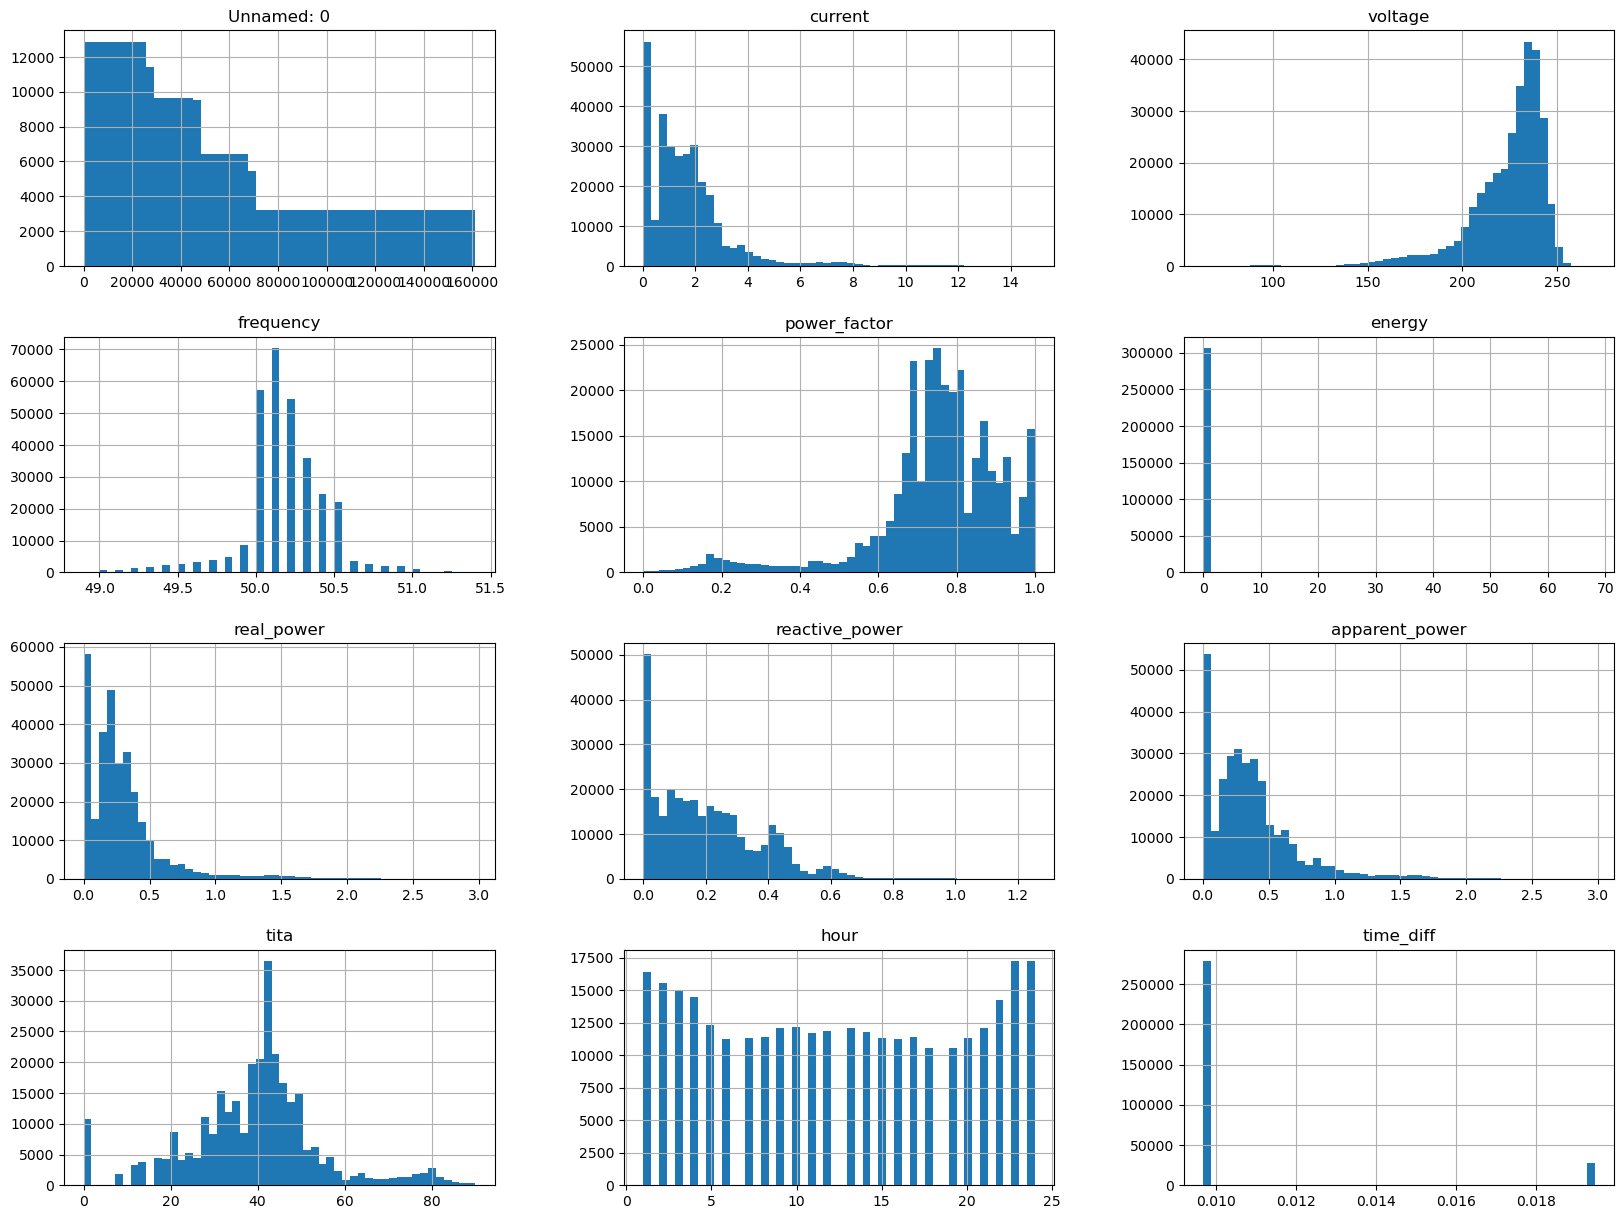

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
meters.hist(bins=50, figsize=[20,15]);

In [7]:
def extract_meter(meter_id):
    meter = meters[meters['meter_id'] == str(meter_id)]
    return meter

In [8]:
extract_meter('OND023').head(1)

,Unnamed: 0,meter_id,w_timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675


In [9]:
def clean_meter_data(df):
    df = df.iloc[:,3:12]
    df = df.dropna()
    return df

In [10]:
on23 = clean_meter_data(extract_meter('OND023'))

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(on23, test_size=0.2, random_state=42)

**Discover and Visualize the Data to Gain insights**

In [12]:
train_copy = train.copy()

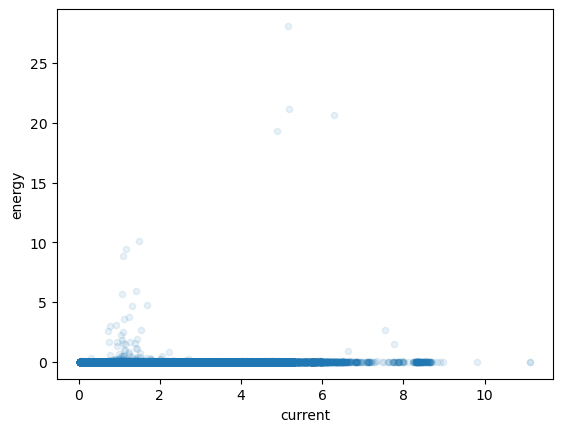

In [13]:
train_copy.plot(kind='scatter', x='current', y='energy', alpha=0.1);

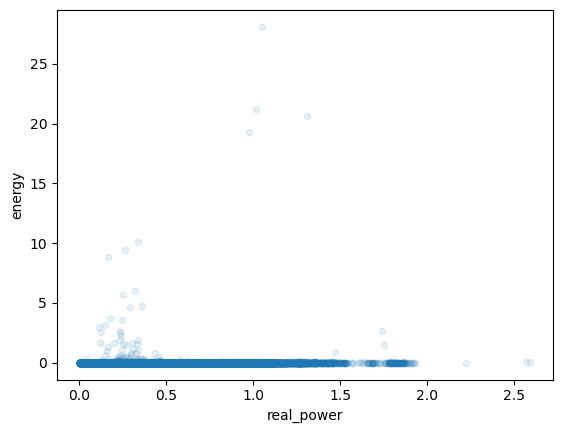

In [14]:
train_copy.plot(kind='scatter', x='real_power', y='energy', alpha=0.1);

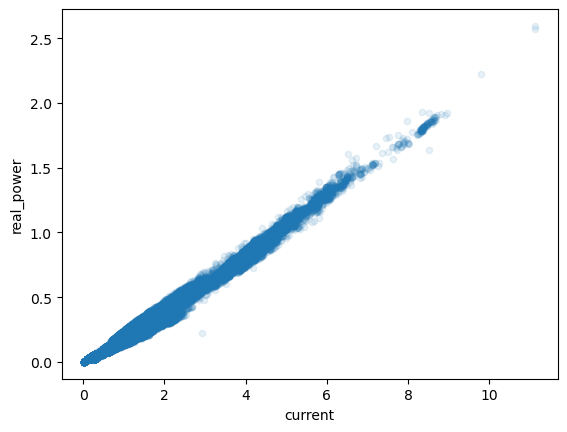

In [15]:
train_copy.plot(kind='scatter', x='current', y='real_power', alpha=0.1);

looking for correlations

In [16]:
corr_matrix = train.corr()
corr_matrix

,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita
current,1.000000,0.010359,-0.039926,0.290543,0.038854,0.989672,0.898861,0.998541,-0.287982
voltage,0.010359,1.000000,0.259617,-0.030140,0.003174,0.042856,0.080271,0.051734,0.032466
frequency,-0.039926,0.259617,1.000000,0.054131,-0.004695,-0.026685,-0.037228,-0.031096,-0.048109
power_factor,0.290543,-0.030140,0.054131,1.000000,0.012908,0.367364,0.029671,0.289122,-0.977800
energy,0.038854,0.003174,-0.004695,0.012908,1.000000,0.039152,0.034284,0.039020,-0.014187
real_power,0.989672,0.042856,-0.026685,0.367364,0.039152,1.000000,0.837458,0.990327,-0.376771
reactive_power,0.898861,0.080271,-0.037228,0.029671,0.034284,0.837458,1.000000,0.903796,0.021897
apparent_power,0.998541,0.051734,-0.031096,0.289122,0.039020,0.990327,0.903796,1.000000,-0.285681
tita,-0.287982,0.032466,-0.048109,-0.977800,-0.014187,-0.376771,0.021897,-0.285681,1.000000


In [17]:
corr_matrix['energy'].sort_values(ascending=False)

energy            1.000000
real_power        0.039152
apparent_power    0.039020
current           0.038854
reactive_power    0.034284
power_factor      0.012908
voltage           0.003174
frequency        -0.004695
tita             -0.014187
Name: energy, dtype: float64

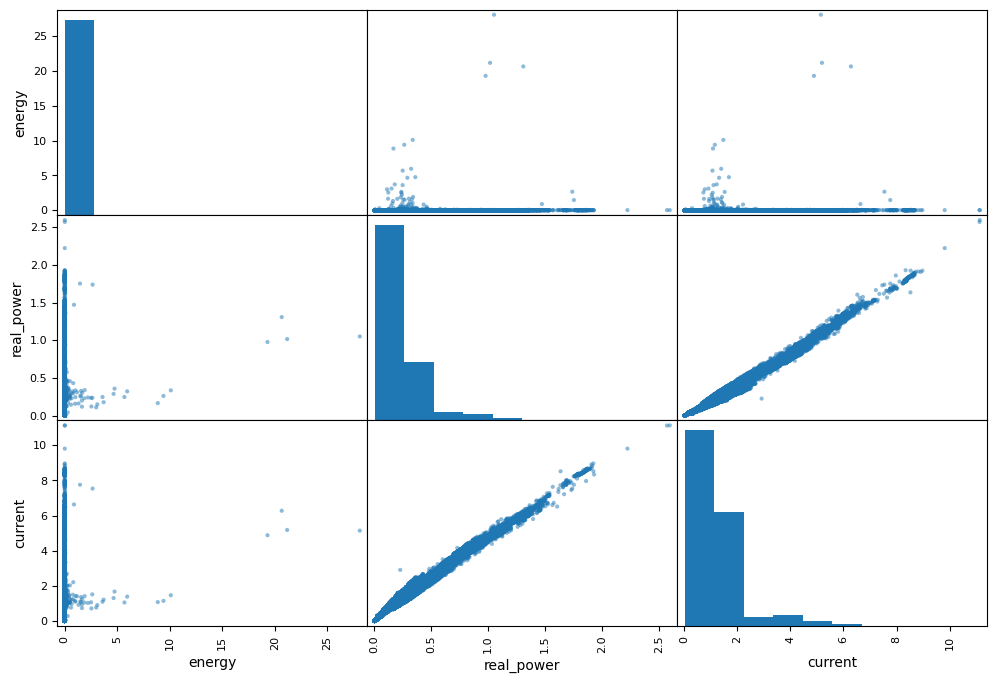

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['energy','real_power','current']
scatter_matrix(train[attributes], figsize=(12,8));

drop outliers from energy

In [19]:
index = train_copy[train_copy['energy'] > 3].index 
train_copy = train_copy.drop(index)

In [20]:
train_features = train_copy.drop('energy',axis=1)
train_target = train_copy['energy']

**Transformation Pipelines**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

x_prepared = pipeline.fit_transform(train_features)

**Fitting Model**

Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_prepared, train_target)

LinearRegression()

In [23]:
some_data = train_features.iloc[:5]
some_labels = train_target.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print('Predictions:',lin_reg.predict(some_data_prepared))
print('Labels:',list(some_labels))

Predictions: [0.00147741 0.00147567 0.00163061 0.00030338 0.0004447 ]
Labels: [0.0013363520895537, 0.0012711134030862, 0.0013049768563125, 0.000248380068769, 0.000252396137351]


In [24]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(x_prepared)
lin_mse = mean_squared_error(train_target,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.02339938436177159

Decison Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_prepared,train_target)

DecisionTreeRegressor()

In [26]:
predictions = tree_reg.predict(x_prepared)
tree_mse = mean_squared_error(train_target, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0012594291886448162

cross validation

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, x_prepared, train_target,
                        scoring= "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x_prepared, train_target,
                        scoring= "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [32]:
# let's check the performance
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [33]:
display_scores(lin_rmse_scores)

Scores: [0.02771901 0.00991328 0.00715993 0.02239166 0.03443092 0.04228158
 0.00533144 0.02557012 0.00569421 0.01928962]
Mean: 0.019978176763224054
Standard deviation: 0.012198282949093768


In [34]:
display_scores(tree_rmse_scores)

Scores: [0.0290406  0.01818672 0.02650429 0.03022708 0.05006457 0.04599606
 0.01054912 0.02574705 0.02825531 0.02268967]
Mean: 0.028726046384803805
Standard deviation: 0.011170882185560092


In [114]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [37]:
# evaluate model performance on test sest

X_test = test.drop('energy', axis=1)
y_test = test['energy'].copy()

X_test_prepared = pipeline.transform(X_test)

lin_final_predictions = lin_reg.predict(X_test_prepared)

lin_final_mse = mean_squared_error(y_test, lin_final_predictions)
lin_final_rmse = np.sqrt(lin_final_mse)
lin_final_rmse

0.016685401852391018

In [38]:
# evaluate model performance on test sest

X_test = test.drop('energy', axis=1)
y_test = test['energy'].copy()

X_test_prepared = pipeline.transform(X_test)

tree_final_predictions = tree_reg.predict(X_test_prepared)

tree_final_mse = mean_squared_error(y_test, tree_final_predictions)
tree_final_rmse = np.sqrt(tree_final_mse)
tree_final_rmse

0.024883448376869313